<a href="https://colab.research.google.com/github/sonjoy1s/project_weak_ML/blob/main/Health_Insurance_Claims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
#from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [113]:
df = pd.read_excel("/content/Health Insurance Fraud Claims.xlsx")

In [114]:
df.head()

,ClaimID,PatientID,ProviderID,ClaimAmount,ClaimDate,DiagnosisCode,ProcedureCode,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod,Cluster,ClaimLegitimacy
0,4d76c7f7-d36a-4139-b451-a9a4ad10d7d5,19cf2638-3ec0-4ed9-9995-d9ba4553813a,a3d0cc80-dffe-40ff-a302-23c8ffeedb36,7820.52,2024-07-08,Ta150,iO013,96,F,Orthopedics,Pending,57595.11,Single,Employed,New Alishaview,Inpatient,Paper,3,Legitimate
1,e35193b4-3609-492b-866a-98de19317e9c,5c4bb6c5-4dd3-4a86-85fa-f36c0d8debff,a9f25acf-92b8-45e2-9cef-87bd07d0a591,5453.86,2024-07-08,Fo766,jR349,95,M,Cardiology,Denied,140772.72,Widowed,Employed,East Curtis,Inpatient,Online,2,Legitimate
2,1f3fa373-25ed-4ff4-b6c7-38dcb2fb297f,777866e0-4d10-45a8-a7b4-dbdaa26d5a81,951b1e08-9948-4956-80e5-9277f16bd290,8229.86,2024-07-08,AX876,uU479,10,M,Cardiology,Pending,69803.19,Married,Student,Lake Jennifer,Emergency,Online,3,Legitimate
3,af6a68f4-8319-47b1-a28b-77de01572851,9d7c53ee-eb1a-4f07-9e3a-e86cf82e9f0f,de9e193a-f9a1-4d63-9345-aefe75694628,9519.16,2024-07-08,SQ441,Xs264,59,F,Cardiology,Pending,135530.12,Married,Employed,Martinstad,Routine,Phone,2,Legitimate
4,417fe944-79d2-4610-81c4-a2d496f29ee4,db14b0ca-ac2a-4e83-b085-947ea32e7587,5c7d7045-71b6-4c15-937c-43e4cfe65bf4,3226.15,2024-07-08,FK970,PV476,36,F,Neurology,Approved,36995.52,Divorced,Unemployed,Thomasfurt,Inpatient,Phone,1,Legitimate


In [115]:
df.columns

Index(['ClaimID', 'PatientID', 'ProviderID', 'ClaimAmount', 'ClaimDate',
       'DiagnosisCode', 'ProcedureCode', 'PatientAge', 'PatientGender',
       'ProviderSpecialty', 'ClaimStatus', 'PatientIncome',
       'PatientMaritalStatus', 'PatientEmploymentStatus', 'ProviderLocation',
       'ClaimType', 'ClaimSubmissionMethod', 'Cluster', 'ClaimLegitimacy'],
      dtype='object')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ClaimID                  4500 non-null   object        
 1   PatientID                4500 non-null   object        
 2   ProviderID               4500 non-null   object        
 3   ClaimAmount              4500 non-null   float64       
 4   ClaimDate                4500 non-null   datetime64[ns]
 5   DiagnosisCode            4500 non-null   object        
 6   ProcedureCode            4500 non-null   object        
 7   PatientAge               4500 non-null   int64         
 8   PatientGender            4500 non-null   object        
 9   ProviderSpecialty        4500 non-null   object        
 10  ClaimStatus              4500 non-null   object        
 11  PatientIncome            4500 non-null   float64       
 12  PatientMaritalStatus     4500 non-

In [117]:
df.drop(columns=['ClaimID', 'PatientID', 'ProviderID','ClaimDate','DiagnosisCode','ProcedureCode'],inplace=True)

In [118]:
df.head()

,ClaimAmount,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod,Cluster,ClaimLegitimacy
0,7820.52,96,F,Orthopedics,Pending,57595.11,Single,Employed,New Alishaview,Inpatient,Paper,3,Legitimate
1,5453.86,95,M,Cardiology,Denied,140772.72,Widowed,Employed,East Curtis,Inpatient,Online,2,Legitimate
2,8229.86,10,M,Cardiology,Pending,69803.19,Married,Student,Lake Jennifer,Emergency,Online,3,Legitimate
3,9519.16,59,F,Cardiology,Pending,135530.12,Married,Employed,Martinstad,Routine,Phone,2,Legitimate
4,3226.15,36,F,Neurology,Approved,36995.52,Divorced,Unemployed,Thomasfurt,Inpatient,Phone,1,Legitimate


In [119]:
le = LabelEncoder()
df['ClaimLegitimacy'] = le.fit_transform(df['ClaimLegitimacy'])
df['PatientGender'] = le.fit_transform(df['PatientGender'])

In [120]:
df.head()

,ClaimAmount,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod,Cluster,ClaimLegitimacy
0,7820.52,96,0,Orthopedics,Pending,57595.11,Single,Employed,New Alishaview,Inpatient,Paper,3,1
1,5453.86,95,1,Cardiology,Denied,140772.72,Widowed,Employed,East Curtis,Inpatient,Online,2,1
2,8229.86,10,1,Cardiology,Pending,69803.19,Married,Student,Lake Jennifer,Emergency,Online,3,1
3,9519.16,59,0,Cardiology,Pending,135530.12,Married,Employed,Martinstad,Routine,Phone,2,1
4,3226.15,36,0,Neurology,Approved,36995.52,Divorced,Unemployed,Thomasfurt,Inpatient,Phone,1,1


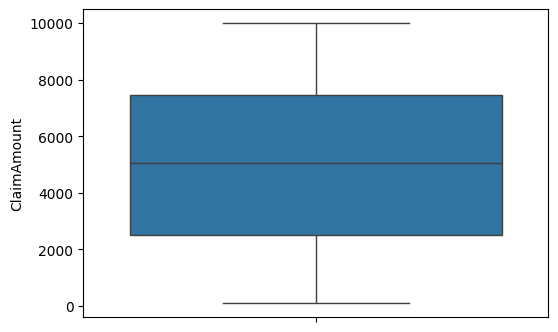

In [121]:
plt.figure(figsize=(6,4))
sns.boxplot(df['ClaimAmount'])
plt.show()

In [122]:
corr_target = df.select_dtypes(include=np.number).corr()['ClaimLegitimacy'].sort_values(ascending=False)
print(corr_target)

ClaimLegitimacy    1.000000
PatientIncome      0.326797
Cluster            0.107790
PatientAge         0.004466
PatientGender     -0.018567
ClaimAmount       -0.327875
Name: ClaimLegitimacy, dtype: float64


In [123]:
X = df.drop(columns=['ClaimLegitimacy'],axis=1)
y = df['ClaimLegitimacy']

In [124]:
numerical_cols  = X.select_dtypes(include=np.number).columns

print(numerical_cols)

categorical_cols = X.select_dtypes(include=object).columns

print(categorical_cols)

Index(['ClaimAmount', 'PatientAge', 'PatientGender', 'PatientIncome',
       'Cluster'],
      dtype='object')
Index(['ProviderSpecialty', 'ClaimStatus', 'PatientMaritalStatus',
       'PatientEmploymentStatus', 'ProviderLocation', 'ClaimType',
       'ClaimSubmissionMethod'],
      dtype='object')


In [125]:
df.head()

,ClaimAmount,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod,Cluster,ClaimLegitimacy
0,7820.52,96,0,Orthopedics,Pending,57595.11,Single,Employed,New Alishaview,Inpatient,Paper,3,1
1,5453.86,95,1,Cardiology,Denied,140772.72,Widowed,Employed,East Curtis,Inpatient,Online,2,1
2,8229.86,10,1,Cardiology,Pending,69803.19,Married,Student,Lake Jennifer,Emergency,Online,3,1
3,9519.16,59,0,Cardiology,Pending,135530.12,Married,Employed,Martinstad,Routine,Phone,2,1
4,3226.15,36,0,Neurology,Approved,36995.52,Divorced,Unemployed,Thomasfurt,Inpatient,Phone,1,1


In [126]:
#numerical Pipeline
numerical_pipe = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)

In [127]:
categorical_pipe = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('onehot',OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [128]:
#Combine numerical and categorical

from sklearn.compose import ColumnTransformer
Combine_pipe = ColumnTransformer([
    ('num',numerical_pipe,numerical_cols),
    ('cat',categorical_pipe,categorical_cols)
]
)

In [129]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state=42,stratify=y)

In [130]:
# base Learner
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
#lgb = LGBMClassifier()
#cat = CatBoostClassifier()

In [131]:
#voting Classification
voting_cls = VotingClassifier(
    estimators=[
        ('lr',lr),
        ('dt',dt),
        ('rf',rf),
        ('gb',gb),
        ('xgb',xgb)

    ]
)

In [132]:
#Stacking

stacking_cls = StackingClassifier(
    estimators=[
        ('lr',lr),
        ('dt',dt),
        ('rf',rf),
        ('gb',gb),
        ('xgb',xgb)
    ]
)

In [133]:
model_to_train = {
    'Logistic Regression':lr,
    'Decision Tree':dt,
    'Random Forest':rf,
    'Gradient Boosting':gb,
    'XGBoost':xgb,
    'Voting Classifier':voting_cls,
    'Stacking Classifier':stacking_cls
}

In [136]:
# Train and Evaluate Models
results = []
for model_name, model in model_to_train.items():
  print(f"--- Training and Evaluating {model_name} ---")
  pipe = Pipeline(
      steps=[
          ('combine', Combine_pipe),
          ('model', model)
      ]
  )
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)

  results.append({
      'model_name': model_name,
      'accuracy': accuracy,
      'classification_report': report,
      'confusion_matrix': cm
  })
  print(f"Accuracy for {model_name}: {accuracy:.4f}")
  print(f"Classification Report for {model_name}:\n{report}")
  print(f"Confusion Matrix for {model_name}:\n{cm}\n")

print("\n--- All Model Results Summary ---")
for res in results:
    print(f"Model: {res['model_name']}, Accuracy: {res['accuracy']:.4f}")

--- Training and Evaluating Logistic Regression ---
Accuracy for Logistic Regression: 0.9844
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        54
           1       0.99      1.00      0.99       846

    accuracy                           0.98       900
   macro avg       0.96      0.90      0.93       900
weighted avg       0.98      0.98      0.98       900

Confusion Matrix for Logistic Regression:
[[ 43  11]
 [  3 843]]

--- Training and Evaluating Decision Tree ---
Accuracy for Decision Tree: 0.9978
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       1.00      1.00      1.00       846

    accuracy                           1.00       900
   macro avg       0.99      0.99      0.99       900
weighted avg       1.00      1.00      1.00       900

Confusion Matrix f

The best performing model is XGBoost with an accuracy of 1.0000


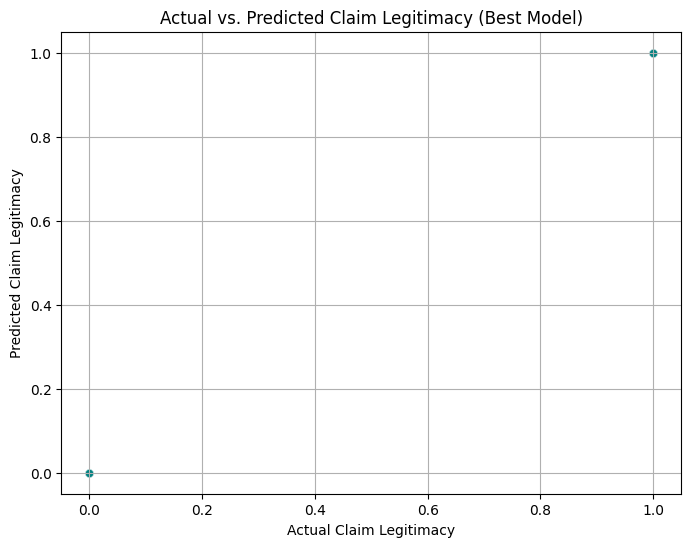

In [138]:
best_accuracy = -1
best_model_name = ''
best_model_obj = None

for res in results:
    if res['accuracy'] > best_accuracy:
        best_accuracy = res['accuracy']
        best_model_name = res['model_name']

best_model_obj = model_to_train[best_model_name]

print(f"The best performing model is {best_model_name} with an accuracy of {best_accuracy:.4f}")

#fit the best model
final_pipe = Pipeline([
    ('combine', Combine_pipe),
    ('model',best_model_obj)
])

final_pipe.fit(X_train,y_train)
y_final_pred = final_pipe.predict(X_test)


#plot Actual vs predicted
plt.figure( figsize = (8,6) )
sns.scatterplot(x=y_test, y=y_final_pred, alpha = 0.6, color='teal' )
plt.xlabel("Actual Claim Legitimacy")
plt.ylabel("Predicted Claim Legitimacy")
plt.title("Actual vs. Predicted Claim Legitimacy (Best Model)")
plt.grid(True)
plt.show()

In [141]:
model_lr = LogisticRegression()
pipe_lr = Pipeline(
    steps=[
        ('combine', Combine_pipe),
        ('model', model_lr)
    ]
)
pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        54
           1       0.99      1.00      0.99       846

    accuracy                           0.98       900
   macro avg       0.96      0.90      0.93       900
weighted avg       0.98      0.98      0.98       900

